In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline 

Using TensorFlow backend.


In [2]:
# Размер мини-выборки
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

C:\Users\Batman\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


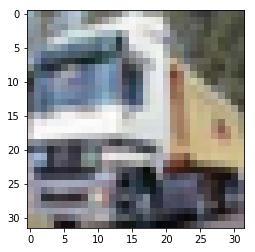

Номер класса: [9]
Тип объекта: грузовик


In [4]:
n = 1
plt.imshow(toimage(X_train[n]))
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n][0]])

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model_json=model.to_json()
json_file=open("cifart_model_conv.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar_model_conv.h5")

In [13]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 78.90%


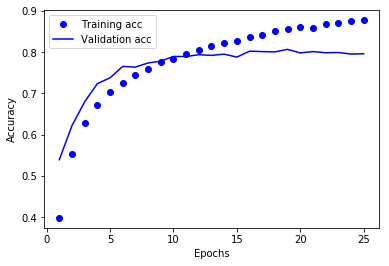

In [14]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

C:\Users\Batman\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


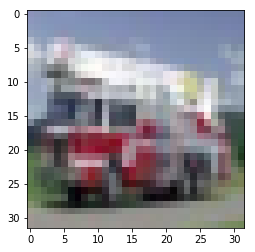

In [15]:
index=89
plt.imshow(toimage(X_test[index]))
plt.show()

In [16]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

In [17]:
prediction = model.predict(x)
print(prediction)
prediction = np.argmax(prediction)
print(classes[prediction])

[[5.12835470e-07 2.82681995e-05 2.61419795e-17 1.09336326e-14
  1.62988115e-17 5.23557576e-16 1.32628847e-12 9.42667981e-14
  4.74232098e-10 9.99971271e-01]]
грузовик


In [18]:
print(classes[y_test[index][0]])

грузовик


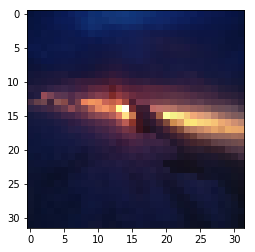

In [20]:
img_path = (r"D:\Batman\Pictures\IMG_20171022_071310.jpg")
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

In [21]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

In [22]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

самолет
